**What is the business question?**

The goal is to predict whether a customer will churn (leave the company) or remain an active customer based on their demographic information, subscribed services, and billing details.

**What does the target variable represent?**

churn ( yes / no )
yes means customer churns 

**What does positive class mean?**

churn = yes 

**What kind of ML task is this?**

binary classfication 

Correctly identifying customers likely to churn allows the company to take proactive retention actions, reducing revenue loss.

In [56]:
import pandas as pd 
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
n_rows, n_cols = df.shape
n_rows, n_cols

(7043, 21)

In [59]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges  should be a int64

drop customer id

In [61]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns


print("Numerical features:")
print(numerical_features.tolist())

print("\nCategorical features:")
print(categorical_features.tolist())

Numerical features:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical features:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [62]:
id_columns = [
    col for col in df.columns
    if df[col].nunique() == n_rows
]
print("Potential ID columns:")
print(id_columns)

Potential ID columns:
['customerID']


In [63]:
overview = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

overview



,Feature,Data Type,Unique Values
0,customerID,object,7043
1,gender,object,2
2,SeniorCitizen,int64,2
3,Partner,object,2
4,Dependents,object,2
5,tenure,int64,73
6,PhoneService,object,2
7,MultipleLines,object,3
8,InternetService,object,3
9,OnlineSecurity,object,3


In [64]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [65]:
df['Churn'].value_counts(normalize=True) # churn rate

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

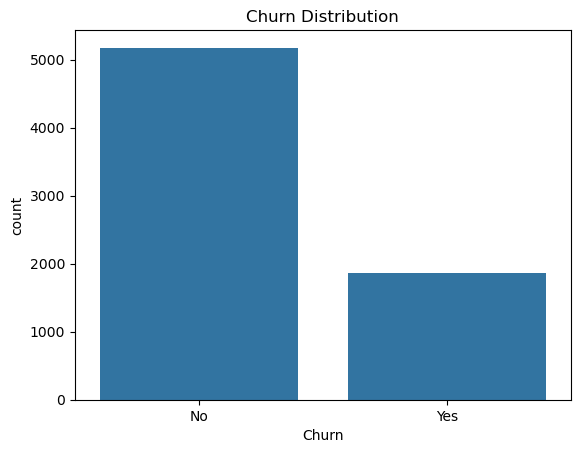

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


The target variable shows a moderate class imbalance. Approximately 26% of customers have churned, while 74% remained active. Due to this imbalance, accuracy alone may not be a reliable evaluation metric, and metrics such as F1-score and ROC-AUC will be preferred.

In [67]:
# List object columns (suspects)
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [68]:
#Are there features stored as text but should be numeric?
# how to know ?? Inspect unique values
for col in object_cols:
    print(f"\n{col}")
    print(df[col].unique()[:10])


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']

Churn
['No' 'Yes']


TotalCharges should be numerical

In [69]:
for col in object_cols:
    converted = pd.to_numeric(df[col], errors='coerce')
    n_missing = converted.isna().sum()
    print(f"{col}: NaNs after conversion = {n_missing}")


customerID: NaNs after conversion = 7043
gender: NaNs after conversion = 7043
Partner: NaNs after conversion = 7043
Dependents: NaNs after conversion = 7043
PhoneService: NaNs after conversion = 7043
MultipleLines: NaNs after conversion = 7043
InternetService: NaNs after conversion = 7043
OnlineSecurity: NaNs after conversion = 7043
OnlineBackup: NaNs after conversion = 7043
DeviceProtection: NaNs after conversion = 7043
TechSupport: NaNs after conversion = 7043
StreamingTV: NaNs after conversion = 7043
StreamingMovies: NaNs after conversion = 7043
Contract: NaNs after conversion = 7043
PaperlessBilling: NaNs after conversion = 7043
PaymentMethod: NaNs after conversion = 7043
TotalCharges: NaNs after conversion = 11
Churn: NaNs after conversion = 7043


In [70]:
for col in object_cols:
    empty_count = (df[col] == '').sum()
    print(f"{col}: empty strings = {empty_count}")


customerID: empty strings = 0
gender: empty strings = 0
Partner: empty strings = 0
Dependents: empty strings = 0
PhoneService: empty strings = 0
MultipleLines: empty strings = 0
InternetService: empty strings = 0
OnlineSecurity: empty strings = 0
OnlineBackup: empty strings = 0
DeviceProtection: empty strings = 0
TechSupport: empty strings = 0
StreamingTV: empty strings = 0
StreamingMovies: empty strings = 0
Contract: empty strings = 0
PaperlessBilling: empty strings = 0
PaymentMethod: empty strings = 0
TotalCharges: empty strings = 0
Churn: empty strings = 0


In [71]:
for col in object_cols:
    whitespace_count = df[col].str.strip().eq('').sum()
    print(f"{col}: whitespace-only values = {whitespace_count}")


customerID: whitespace-only values = 0
gender: whitespace-only values = 0
Partner: whitespace-only values = 0
Dependents: whitespace-only values = 0
PhoneService: whitespace-only values = 0
MultipleLines: whitespace-only values = 0
InternetService: whitespace-only values = 0
OnlineSecurity: whitespace-only values = 0
OnlineBackup: whitespace-only values = 0
DeviceProtection: whitespace-only values = 0
TechSupport: whitespace-only values = 0
StreamingTV: whitespace-only values = 0
StreamingMovies: whitespace-only values = 0
Contract: whitespace-only values = 0
PaperlessBilling: whitespace-only values = 0
PaymentMethod: whitespace-only values = 0
TotalCharges: whitespace-only values = 11
Churn: whitespace-only values = 0


In [72]:
data_quality = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes.values,
    'missing_values': df.isna().sum().values,
    'unique_values': [df[col].nunique() for col in df.columns]
})

data_quality


,column,dtype,missing_values,unique_values
0,customerID,object,0,7043
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,73
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


Most numerical features are stored correctly. However, the TotalCharges column is stored as an object type due to the presence of empty strings. After conversion to numeric, missing values were introduced, which will need to be handled during preprocessing.

In [73]:
#How many missing values
missing_summary = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_percentage': df.isna().mean() * 100
})

missing_summary[missing_summary['missing_count'] > 0]

,missing_count,missing_percentage


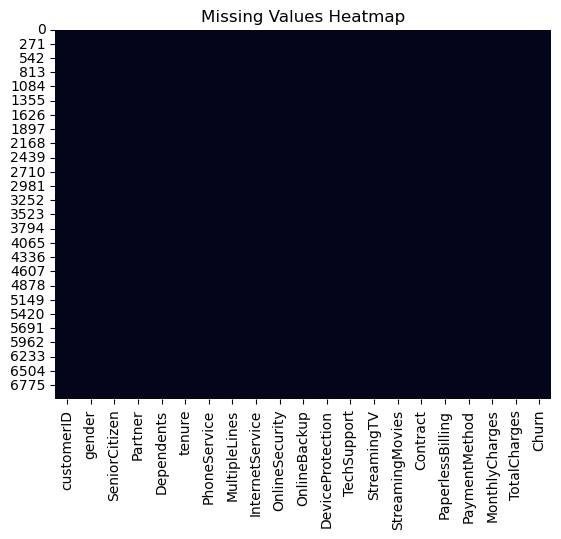

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [75]:
df.shape
df.dropna().shape


(7043, 21)

i will try tp covert totalchargers now to see if i will have some missing values 

In [81]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [77]:
df.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

  TotalCharges column is stored as an object and contains empty string values, which represent missing information. These values are not detected as NaN until the column is converted to a numeric type.


In [87]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [83]:
categorical_features = [
    col for col in df.columns
    if col not in numerical_features + ['customerID']
]

categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [84]:
binary_categorical_features = [
    col for col in categorical_features
    if df[col].nunique() == 2
]

multi_categorical_features = [
    col for col in categorical_features
    if df[col].nunique() > 2
]


In [85]:
binary_categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [86]:
multi_categorical_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

Feature types were defined explicitly based on domain understanding. Numerical features include tenure and billing-related variables. All remaining features, except the customer identifier, were treated as categorical. Categorical features were further divided into binary and multi-category variables based on their number of unique values.

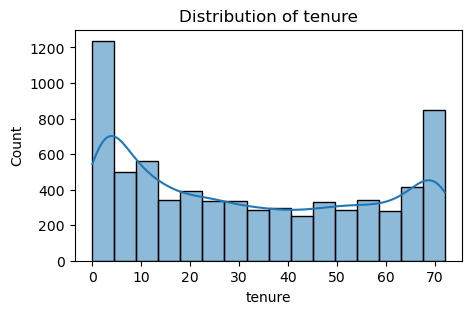

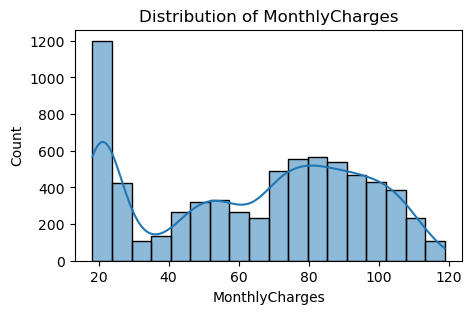

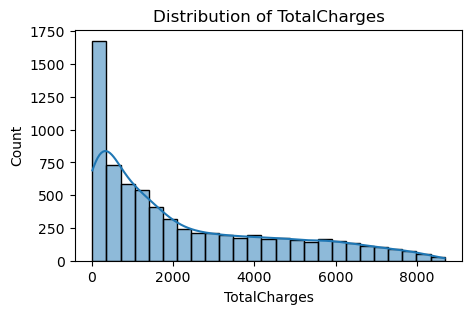

In [ ]:
##Distribution of Each Numerical Feature
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True) , #KDE = Kernel Density Estimation
    plt.title(f"Distribution of {col}")
    plt.show()

In [91]:
df[numerical_features].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [92]:
#Range & Scale
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


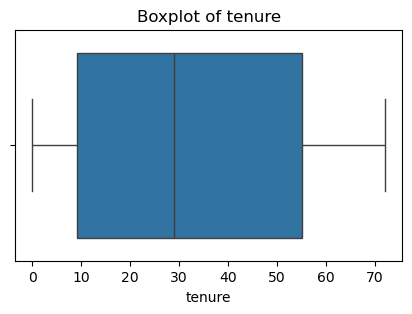

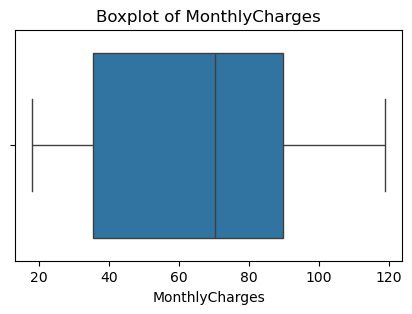

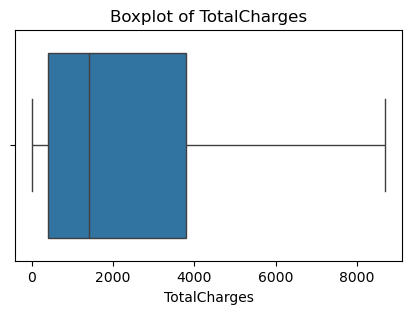

In [93]:
for col in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


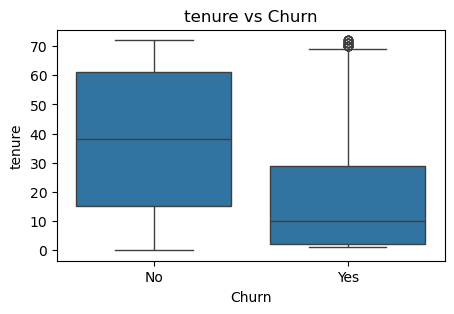

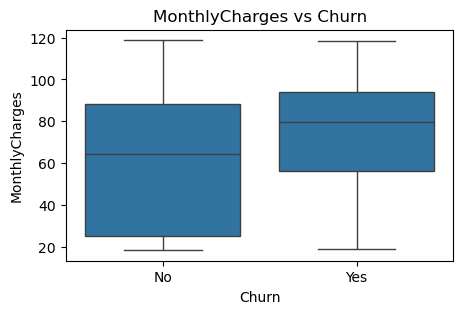

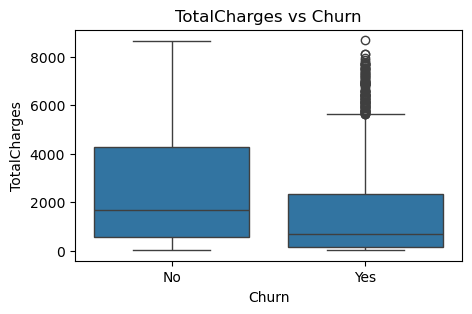

In [94]:
for col in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


Boxplots reveal clear differences between churned and non-churned customers. Customers who churn tend to have significantly lower tenure, indicating that churn occurs more frequently among newer customers. Churned customers also exhibit higher monthly charges, suggesting price sensitivity. TotalCharges shows a strong separation driven largely by tenure, with churned customers having lower cumulative charges. These findings indicate that numerical features are informative for predicting churn and will require scaling for distance-based and linear models.

In [95]:
df.groupby('Churn')[numerical_features].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


In [96]:
df[numerical_features].std()


tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2266.771362
dtype: float64

In [ ]:
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
#exclude Churn

In [100]:
for col in categorical_features:
    print(f"{col}")
    print(df[col].unique())


gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [102]:
for col in categorical_features:
    print(f"\n{col} percentage")
    print(df[col].value_counts(normalize=True) * 100)



gender percentage
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

SeniorCitizen percentage
SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

Partner percentage
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

Dependents percentage
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

PhoneService percentage
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64

MultipleLines percentage
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

InternetService percentage
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

OnlineSecurity percentage
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64

OnlineBacku

In [105]:
for col in categorical_features:
    churn_rate = (
        df.groupby(col)['Churn']
        .value_counts(normalize=True)
        .unstack()
    )
    print(f"\nChurn rate by {col}")
    print(churn_rate)



Churn rate by gender
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Churn rate by SeniorCitizen
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813

Churn rate by Partner
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Churn rate by Dependents
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

Churn rate by PhoneService
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

Churn rate by MultipleLines
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099

Churn rate by InternetService
Churn          

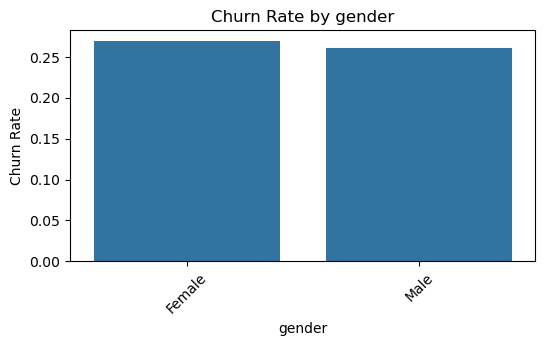

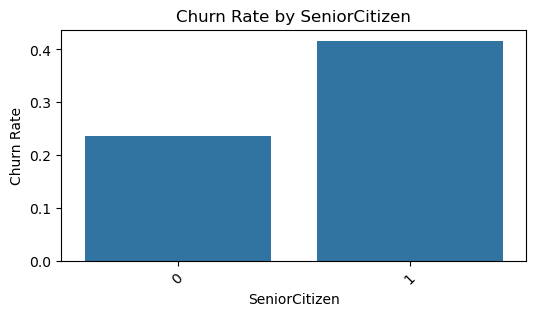

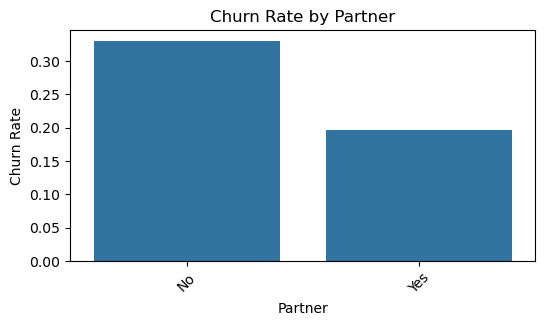

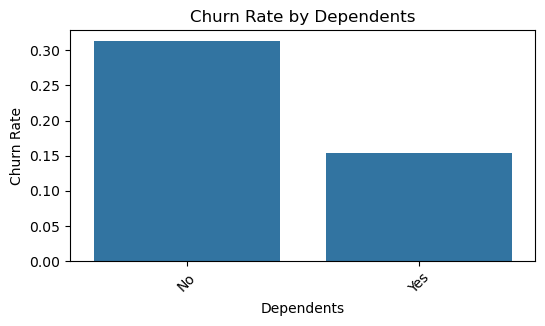

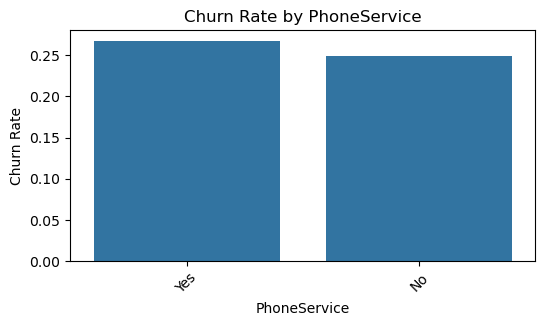

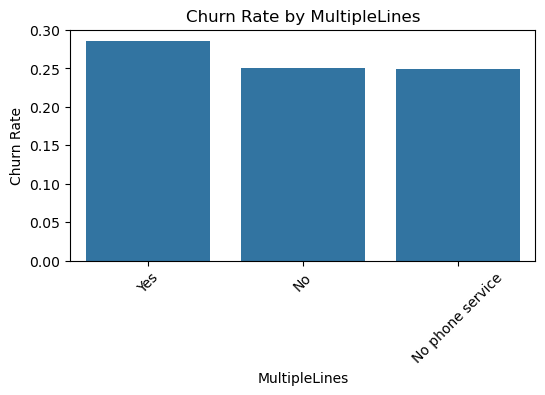

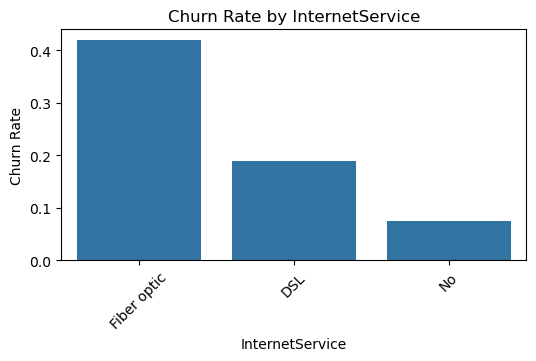

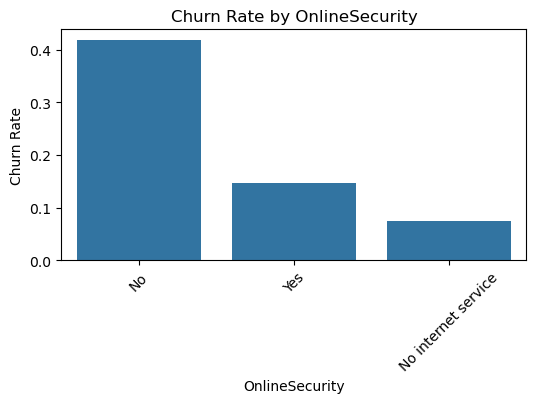

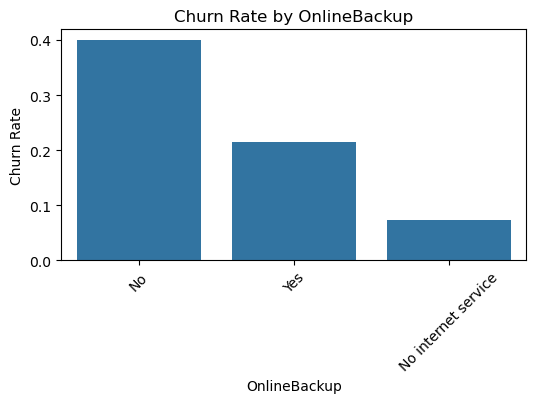

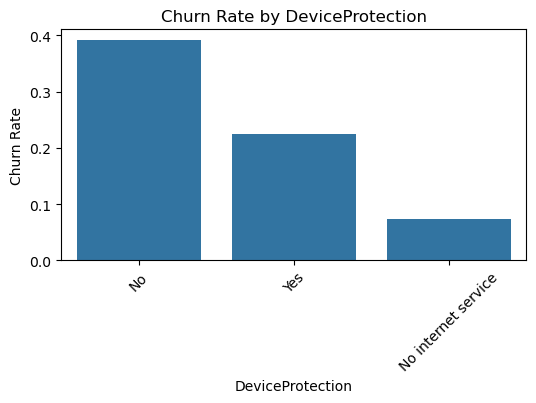

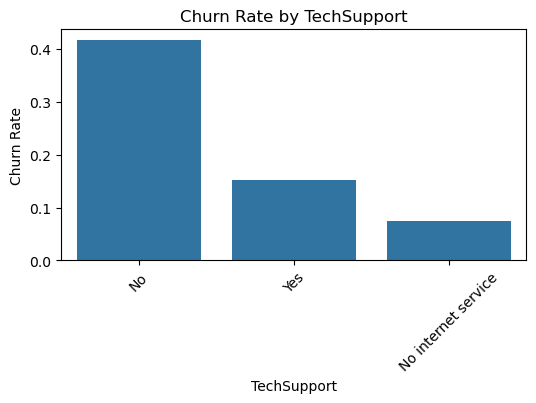

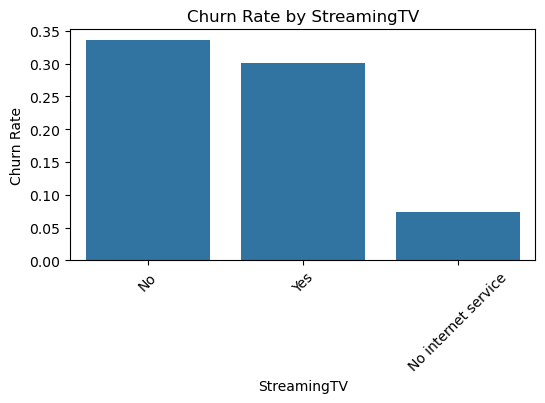

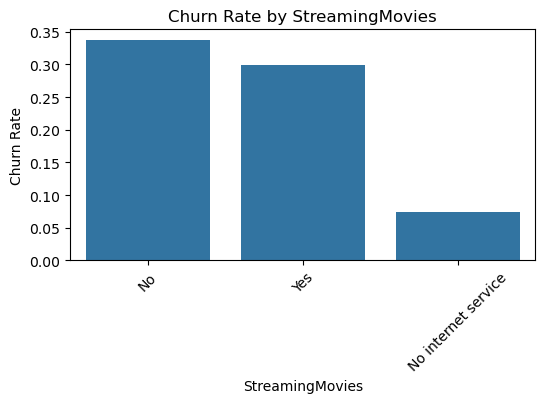

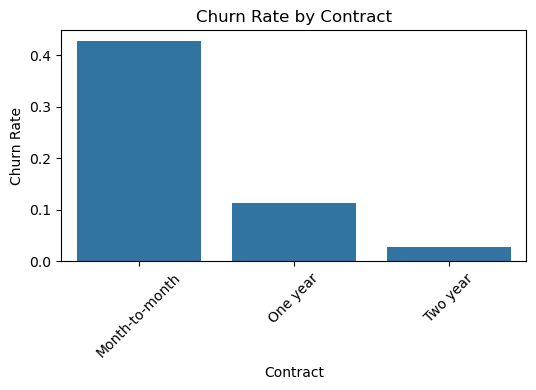

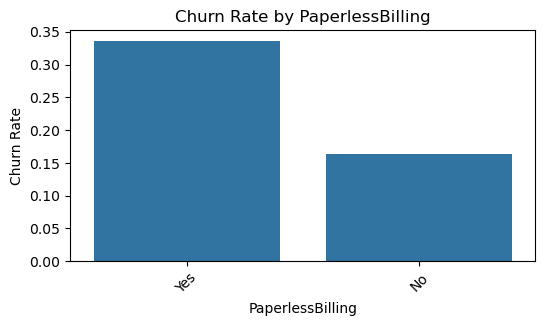

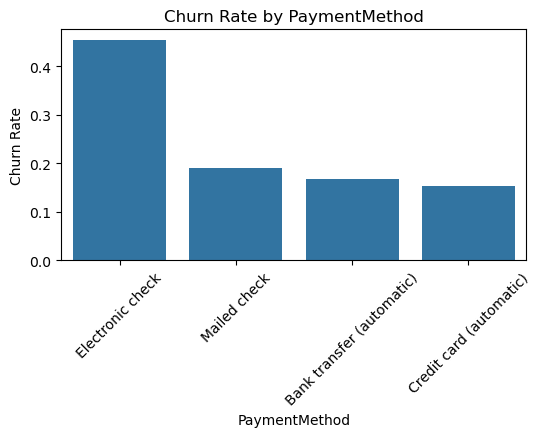

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    churn_rate = (
        df.groupby(col)['Churn']
        .apply(lambda x: (x == 'Yes').mean())
        .sort_values(ascending=False)
    )
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45)
    plt.show()


In [109]:
for col in categorical_features:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < 0.05]
    if not rare.empty:
        print(f"\nRare categories in {col}")
        print(rare)


In [ ]:
#Which categorical features separate churn the most
categorical_churn_strength = {}

for col in categorical_features:
    churn_rates = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean())
    categorical_churn_strength[col] = churn_rates.max() - churn_rates.min()

pd.Series(categorical_churn_strength).sort_values(ascending=False)


Contract            0.398778
InternetService     0.344878
OnlineSecurity      0.343617
TechSupport         0.342305
OnlineBackup        0.325238
DeviceProtection    0.317226
PaymentMethod       0.300423
StreamingMovies     0.262755
StreamingTV         0.261182
SeniorCitizen       0.180751
PaperlessBilling    0.172350
Dependents          0.158289
Partner             0.132931
MultipleLines       0.036832
PhoneService        0.017830
gender              0.007605
dtype: float64

Several categorical features show strong associations with churn. Customers with month-to-month contracts exhibit significantly higher churn rates compared to long-term contracts. Lack of online security and tech support is also associated with higher churn. Payment method and internet service type further influence churn behavior. Some categories appear infrequently and may require grouping during preprocessing.

In [ ]:
#encode churn as numeric (for analysis only):
#Which features seem most predictive of churn?
df['Churn_num'] = (df['Churn'] == 'Yes').astype(int)
df[numerical_features + ['Churn_num']].corr()['Churn_num'].sort_values(ascending=False)

Churn_num         1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_num, dtype: float64

In [112]:
categorical_signal = {}

for col in categorical_features:
    churn_rates = df.groupby(col)['Churn_num'].mean()
    categorical_signal[col] = churn_rates.max() - churn_rates.min()

pd.Series(categorical_signal).sort_values(ascending=False)


Contract            0.398778
InternetService     0.344878
OnlineSecurity      0.343617
TechSupport         0.342305
OnlineBackup        0.325238
DeviceProtection    0.317226
PaymentMethod       0.300423
StreamingMovies     0.262755
StreamingTV         0.261182
SeniorCitizen       0.180751
PaperlessBilling    0.172350
Dependents          0.158289
Partner             0.132931
MultipleLines       0.036832
PhoneService        0.017830
gender              0.007605
dtype: float64

In [113]:
df.groupby('Churn')[numerical_features].median()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,38.0,64.425,1683.60
Yes,10.0,79.650,703.55


In [123]:
corr_matrix =df[numerical_features].corr()


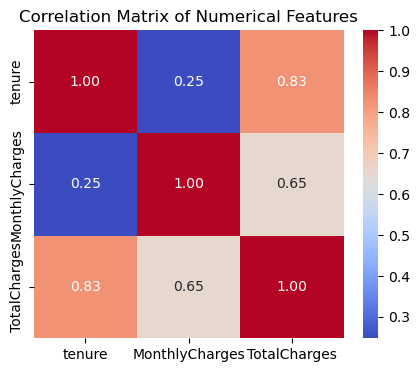

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


tenure ↔ TotalCharges (very high)

In [117]:
df[numerical_features].std()


tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2266.771362
dtype: float64

In [118]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].head()


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


TotalCharges ≈ tenure × MonthlyCharges